In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
youtube = pd.read_csv("C:/Users/georg/Downloads/YouTubeChannels_Python/YouTubeChannels_Python.csv")

In [3]:
youtube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


In [5]:
#Interested variables
youtube1 = youtube[['Gr2de', 'Video views']]

In [6]:
youtube1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


In [7]:
#check for integer
youtube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr2de        5000 non-null   int64
 1   Video views  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [8]:
#Change grade to a letter for ANOVA specs
def recode (series): 
    if series == 0: 
        return "A plus plus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3:
        return "B plus"

youtube1['GradeR'] = youtube1['Gr2de'].apply(recode)

C:\Users\georg\AppData\Local\Temp/ipykernel_13516/1644425444.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube1['GradeR'] = youtube1['Gr2de'].apply(recode)


In [9]:
youtube1.head()

,Gr2de,Video views,GradeR
0,0,20869786591,A plus plus
1,0,47548839843,A plus plus
2,0,9793305082,A plus plus
3,0,22675948293,A plus plus
4,0,26273668433,A plus plus


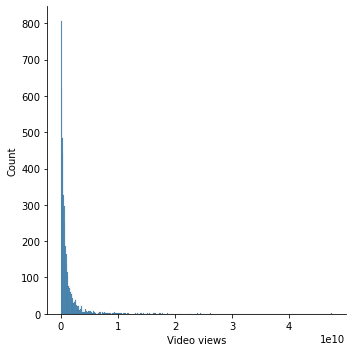

In [13]:
# Test for all assumptions and correct for them if possible

sns.displot(youtube1['Video views'])

In [14]:
#postively skewed

youtube1['VideoViewsSQRT'] = np.sqrt(youtube1['Video views'])

C:\Users\georg\AppData\Local\Temp/ipykernel_13516/3440086829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube1['VideoViewsSQRT'] = np.sqrt(youtube1['Video views'])


C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VideoViewsSQRT', ylabel='Density'>

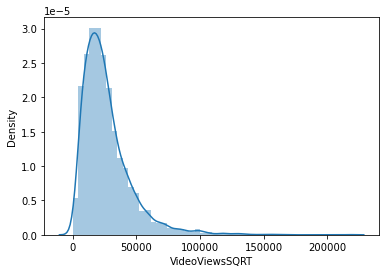

In [15]:
sns.distplot(youtube1['VideoViewsSQRT'])

In [16]:
youtube1['VideoViewsLOG'] = np.log(youtube1['Video views'])

C:\Users\georg\AppData\Local\Temp/ipykernel_13516/33976722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube1['VideoViewsLOG'] = np.log(youtube1['Video views'])


C:\Users\georg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VideoViewsLOG', ylabel='Density'>

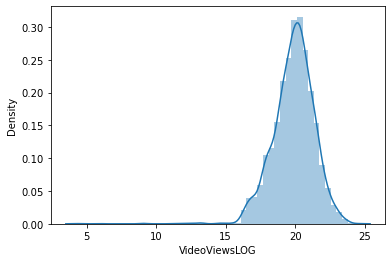

In [17]:
sns.distplot(youtube1['VideoViewsLOG'])

In [ ]:
# better, going to use LOG

In [18]:
#Run an ANOVA
## Homogeneity of Variance
scipy.stats.bartlett(youtube1['VideoViewsLOG'], youtube1['Gr2de'])


BartlettResult(statistic=4642.606911455061, pvalue=0.0)

In [ ]:
#Doesn't meet assumption, variance is unequal

In [21]:
#If significant, run an ANOVA
youtube1.dropna(inplace=True)

C:\Users\georg\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:
stats.f_oneway(youtube1['VideoViewsLOG'][youtube1['GradeR']=='A plus plus'],
                   youtube1['VideoViewsLOG'][youtube1['GradeR']=='A plus'],
               youtube1['VideoViewsLOG'][youtube1['GradeR']=='A'],
               youtube1['VideoViewsLOG'][youtube1['GradeR']=='B plus'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

In [23]:
postHoc = MultiComparison(youtube1['VideoViewsLOG'], youtube1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103  0.001 -4.2146 -1.9913   True
     0      3  -4.1291  0.001 -5.2399 -3.0184   True
     1      2  -1.5797  0.001  -2.133 -1.0264   True
     1      3  -2.6059  0.001 -3.1573 -2.0544   True
     2      3  -1.0262  0.001 -1.1278 -0.9245   True
----------------------------------------------------


In [24]:
youtube1.groupby('GradeR').mean()

,Gr2de,Video views,VideoViewsSQRT,VideoViewsLOG
GradeR,,,,
A,2.0,1.676207e+09,34678.089608,20.475580
A plus,1.0,6.053121e+09,70951.341638,22.055279
A plus plus,0.0,2.119909e+10,139631.341341,23.578544
B plus,3.0,5.265217e+08,19943.101566,19.449400


In [ ]:
The grades are significantly different, and higher ratings seem to get to